В этом ноутбуке мы реализуем, которая по данному ей связному графу выдает вершину, удаление которой не нарушит связность.

Давайте сначала обсудим, почему такая вершина есть.

Мы знаем, что во всяком графе есть остовное дерево. Мы даже знаем, как его найти: например, можно запустить поиск в глубину в графе, тогда ребра, по которым мы пройдем, образуют остовное дерево. Например, на картинке ниже ребра дерева, полученного таким способом, выделены синим цветом (это тот же пример, который мы разобрали в видео).

<br>
<div>
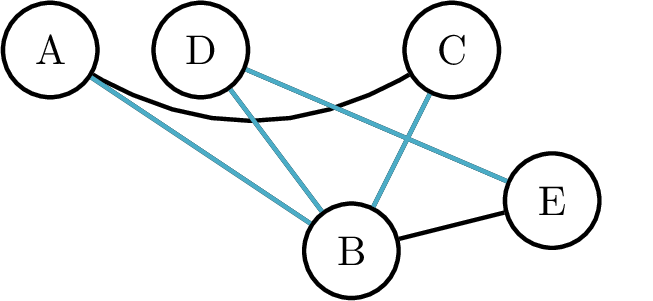
</div>
<br>

Давайте посмотрим на этот пример внимательнее. Синее дерево образует связный подграф в нашем изначальном графе. Нам нужно найти вершину, удаление которой оставит изначальный граф связным. Но если мы найдем вершину в остовном дереве, после удаления которой остовное дерево останется связным, то этого уже будет достаточно: даже граф с меньшим множеством ребер остается связным, тем более будет связным изначальный граф, в котором ребер еще больше.

**Задача.** Пользуясь картинкой выше придумайте, какую вершину можно было бы удалить в графе с синими ребрами, чтобы он остался связным? По какому принципу можно выбирать такую вершину в общем случае?

В следующем ноутбуке Вам нужно будет реализовать функцию, которая находит такую вершину. В нем уже написан поиск в глубину, в том виде, в котором мы его обсуждали. Вам нужно реализовать лишь функцию vertex_deletion(). Подумайте, как лучше использовать массивы pre и post. С их использованием решение может быть очень коротким.


In [6]:
import networkx as nx

graph = nx.Graph()

graph.add_nodes_from(['A','B','C','D','E'])
graph.add_edges_from([('A','B'), ('B','C'), ('C','A'),('B','D'),('B','E'),('D','E')])


clock = 0

pre={}
post={}

def Previsit(v):
    global clock
    pre[v]=clock
    clock+=1

def Postvisit(v):
    global clock
    post[v]=clock
    clock+=1

visited={}
for v in graph:
    visited[v]=False

def Explore(v):
    visited[v]=True
    Previsit(v)
    for u in graph[v]:
        if not visited[u]:
            Explore(u)
    Postvisit(v)
            
def dfs():
    for v in graph:
        if not visited[v]:
            Explore(v)
            
            
def vertex_deletion():
    dfs()
    vertex = None  # Задаем переменную, в которую хотим сохранить вершину, которую можно удалить без нарушения связности
    for v in graph:
        if post.get(v) - pre.get(v) == 1:
            vertex = v
    return vertex
    

dfs()
print(vertex_deletion())

E


In [ ]:
# Этот блок нужен для проверки вашего решения
